# Improving Customer Onboarding at JPMorgan Chase & Co.

In [105]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

print("All Libraries imported successfully!")

All Libraries imported successfully!


In [106]:
df= pd.read_csv("C:\\Users\\n\\Downloads\\archive (12)\\JPM.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-05,61.240002,62.240002,61.220001,62.020000,54.069050,13471100
1,2015-10-06,62.110001,62.360001,61.619999,62.049999,54.095207,12134800
2,2015-10-07,62.549999,63.029999,61.759998,62.130001,54.164944,12773100
3,2015-10-08,61.849998,62.250000,61.430000,62.130001,54.164944,13964600
4,2015-10-09,62.389999,62.549999,61.580002,61.930000,53.990582,12112000


In [93]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
1254,2020-09-28,95.059998,96.930000,94.349998,96.160004,96.160004,20894100,2020,9,0
1255,2020-09-29,96.029999,96.029999,94.330002,95.349998,95.349998,12848200,2020,9,1
1256,2020-09-30,95.349998,97.199997,95.260002,96.269997,96.269997,16389400,2020,9,2
1257,2020-10-01,97.120003,97.769997,96.029999,96.970001,96.970001,15778700,2020,10,3
1258,2020-10-02,95.250000,98.589996,95.089996,97.889999,97.889999,15136500,2020,10,4


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
 7   Year       1259 non-null   int64  
 8   Month      1259 non-null   int64  
 9   Day        1259 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 98.5+ KB


In [56]:
print('The dataset has a shape of {} rows and {} columns'.format(df.shape[0], df.shape[1]), '\n')
print('The dataset has {} duplicate rows'.format(df.duplicated().sum()), '\n')
print('The dataset has {} null values'.format(df.isnull().sum().sum()), '\n')

The dataset has a shape of 1259 rows and 7 columns 

The dataset has 0 duplicate rows 

The dataset has 0 null values 



In [98]:
#Provide the statistical summarry of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000,1259.000000,1259.000000
mean,95.419079,96.307204,94.550993,95.421326,89.548860,1.540551e+07,2017.756156,6.536140,2.024623
std,21.045768,21.193417,20.898621,21.032197,22.133159,6.899382e+06,1.480703,3.423605,1.400726
min,53.900002,53.910000,52.500000,53.070000,46.576813,3.324300e+06,2015.000000,1.000000,0.000000
25%,84.064999,85.314999,83.229999,84.060001,76.426586,1.082145e+07,2017.000000,4.000000,1.000000
50%,98.529999,99.800003,97.419998,98.349998,95.550003,1.361840e+07,2018.000000,7.000000,2.000000
75%,110.694999,111.614998,109.560001,110.600002,104.938705,1.770415e+07,2019.000000,10.000000,3.000000
max,139.899994,141.100006,139.259995,141.089996,137.409225,5.619230e+07,2020.000000,12.000000,4.000000


# Data Types and Data Preprocessing

In [99]:
# 2. Data Types and Data Preprocessing
print("2. Data Types and Data Preprocessing:")
# Display data types of each column
print(df.dtypes)


2. Data Types and Data Preprocessing:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Year           int64
Month          int64
Day            int64
dtype: object


In [100]:
# Check for missing values in the dataset
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
Day          0
dtype: int64


In [102]:
#Print the number of unique values for each column
df.nunique()

Date         1259
Open         1129
High         1123
Low          1119
Close        1110
Adj Close    1212
Volume       1256
Year            6
Month          12
Day             5
dtype: int64

# Data Exploration(EDA) + Visualization

## Open
* The Open price column here means the first price of the day ie the price when the market opens

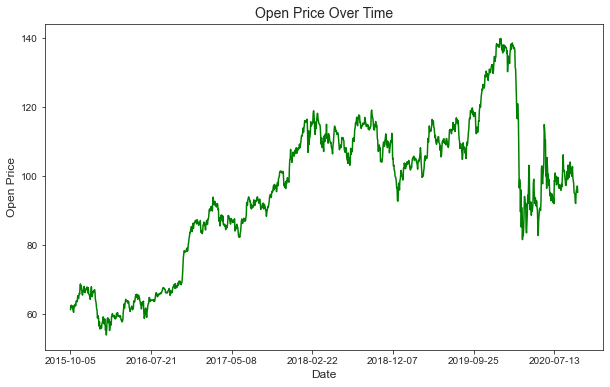

In [103]:
# Visualize the Open price over time
df["Open"].groupby(df["Date"]).mean().plot(figsize=(10, 6), color='g')
plt.title('Open Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Open Price', fontsize=12)
plt.show();

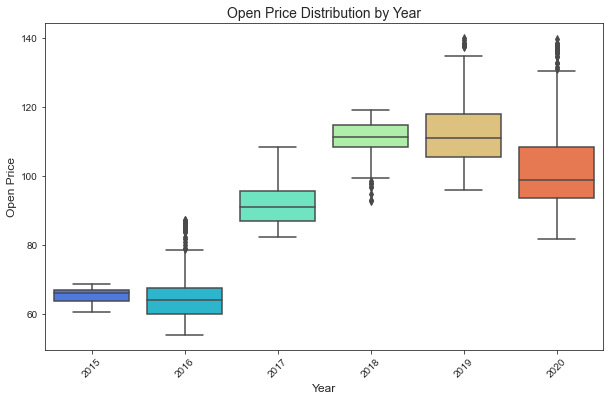

In [104]:
# Performs a year by year trend analysis of the open price
df['Year'] = pd.DatetimeIndex(df['Date']).year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Open', data=df, palette='rainbow')
plt.title('Open Price Distribution by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Open Price', fontsize=12)
plt.show();

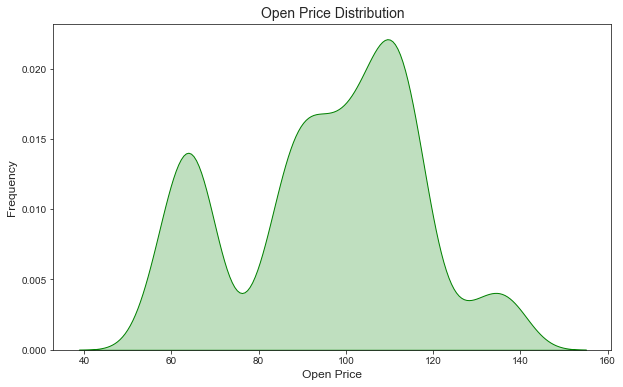

In [97]:
# Open price distribution
sns.set_style('ticks')
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Open'], shade=True, color='g')
plt.title('Open Price Distribution', fontsize=14)
plt.xlabel('Open Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

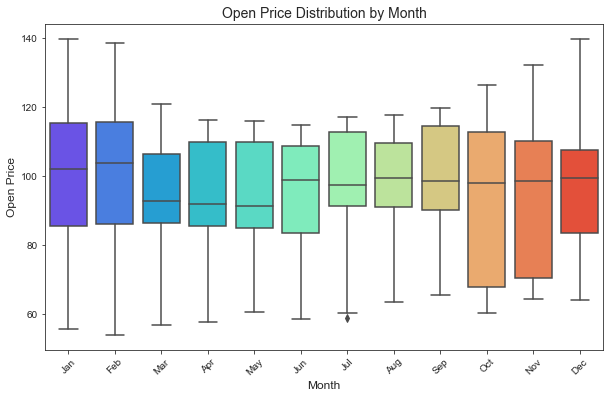

In [61]:
# Open price distribution by month 
df['Month'] = pd.DatetimeIndex(df['Date']).month

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Open', data=df, palette='rainbow')
plt.title('Open Price Distribution by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
# replace the x ticks labels with the month names
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                            'Nov', 'Dec'), rotation=45)
plt.ylabel('Open Price', fontsize=12)
plt.show();

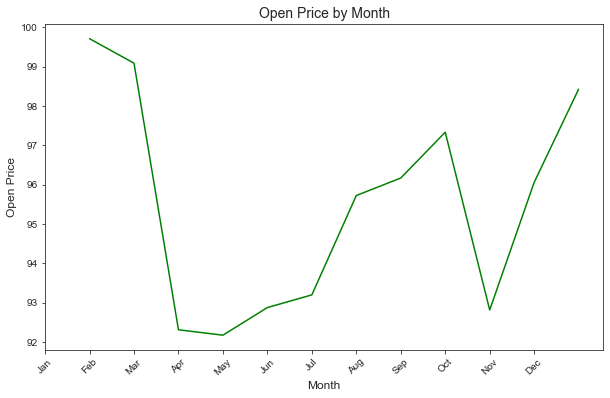

In [62]:
# Line plot of the open price by month
df["Open"].groupby(df["Month"]).mean().plot(figsize=(10, 6), color='g')
plt.title('Open Price by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                            'Nov', 'Dec'), rotation=45) 
plt.ylabel('Open Price', fontsize=12)
plt.show();

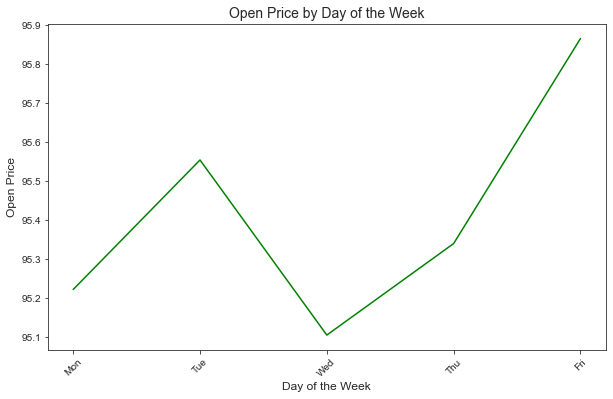

In [63]:
# Open price distribution by day of the week
df['Day'] = pd.DatetimeIndex(df['Date']).dayofweek

df['Open'].groupby(df['Day']).mean().plot(figsize=(10, 6), color='g')
plt.title('Open Price by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Open Price', fontsize=12)
plt.xticks(np.arange(5), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri'), rotation=45)
plt.show();

* The highest opening price is usually on Tuesday and the lowest opening price is usually on Monday


## Close
* Close column is the closing price ie the price when the market closes

<Figure size 720x432 with 0 Axes>

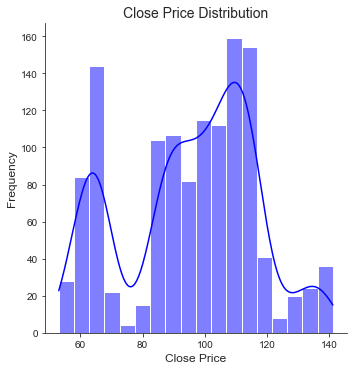

In [64]:
# Close price distribution
plt.figure(figsize=(10, 6))
sns.displot(df['Close'], color='b', kde=True)
plt.title('Close Price Distribution', fontsize=14)
plt.xlabel('Close Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

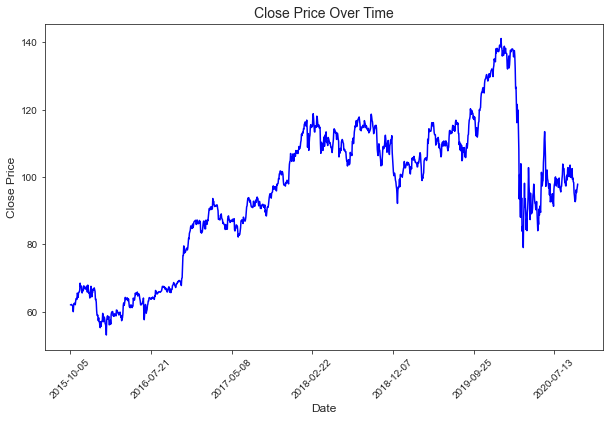

In [65]:
# Closing price over time
df['Close'].groupby(df['Date']).mean().plot(figsize=(10, 6), color='b')
plt.title('Close Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Close Price', fontsize=12)
plt.show();

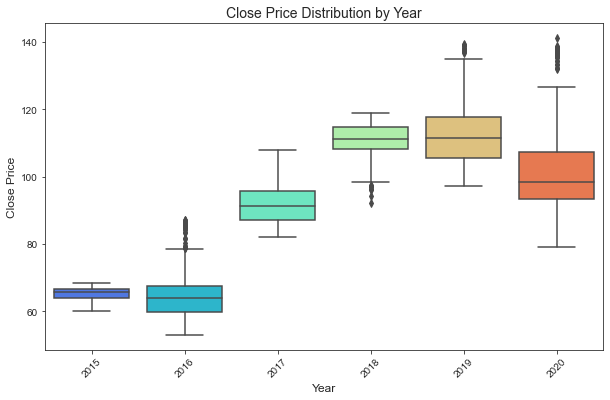

In [66]:
# Do a year by year trend analysis of the close price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Close', data=df, palette='rainbow')
plt.title('Close Price Distribution by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Close Price', fontsize=12)
plt.show();

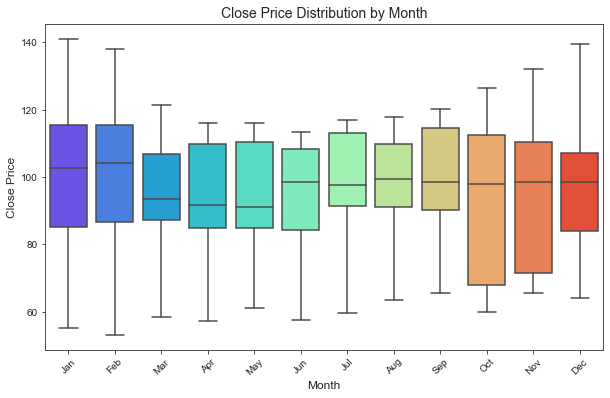

In [67]:
# Close price distribution by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Close', data=df, palette='rainbow')
plt.title('Close Price Distribution by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                            'Nov', 'Dec'), rotation=45) 
plt.ylabel('Close Price', fontsize=12)
plt.show();

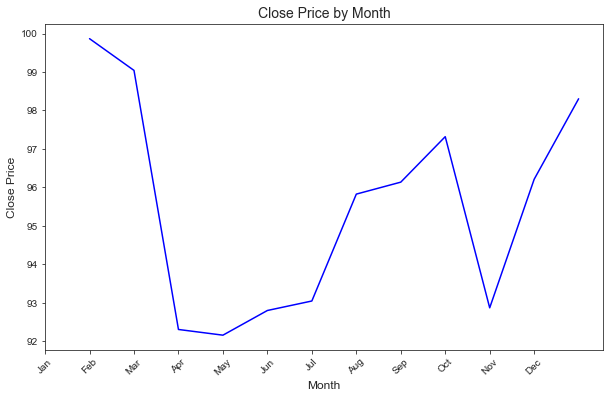

In [68]:
# Line plot of the close price by month
df['Close'].groupby(df['Month']).mean().plot(figsize=(10, 6), color='b')
plt.title('Close Price by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                            'Nov', 'Dec'), rotation=45)
plt.ylabel('Close Price', fontsize=12)
plt.show();

* Both closing and opening prices dip in August

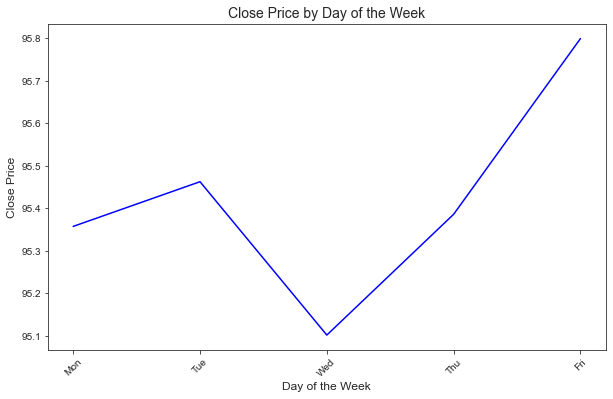

In [69]:
# Close price distribution by day of the week
df['Close'].groupby(df['Day']).mean().plot(figsize=(10, 6), color='b')
plt.title('Close Price by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.xticks(np.arange(5), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri'), rotation=45)
plt.show();

## Adjusted close
* Adjusted close is the closing price adjusted for stock splits and dividends

<Figure size 720x432 with 0 Axes>

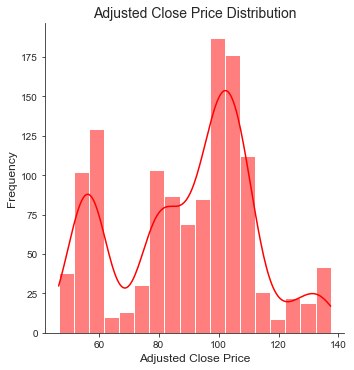

In [70]:
# Adjusted close price distribution
plt.figure(figsize=(10, 6))
sns.displot(df['Adj Close'], color='r', kde=True)
plt.title('Adjusted Close Price Distribution', fontsize=14)
plt.xlabel('Adjusted Close Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

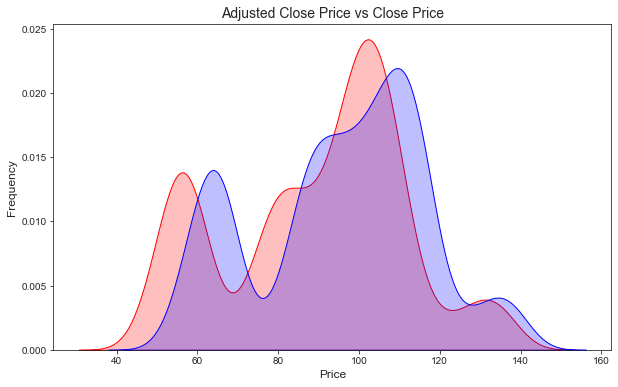

In [71]:
# Comparing Adjusted close and close price
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Adj Close'], shade=True, color='r')
sns.kdeplot(df['Close'], shade=True, color='b')
plt.title('Adjusted Close Price vs Close Price', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

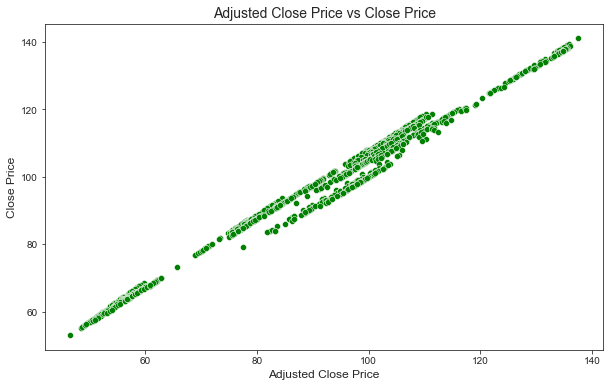

In [72]:
# scatterplot of the adjusted close price vs the close price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Close', data=df, color='g')
plt.title('Adjusted Close Price vs Close Price', fontsize=14)
plt.xlabel('Adjusted Close Price', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show();

## Volume
* Volume is the number of shares traded on a particular day

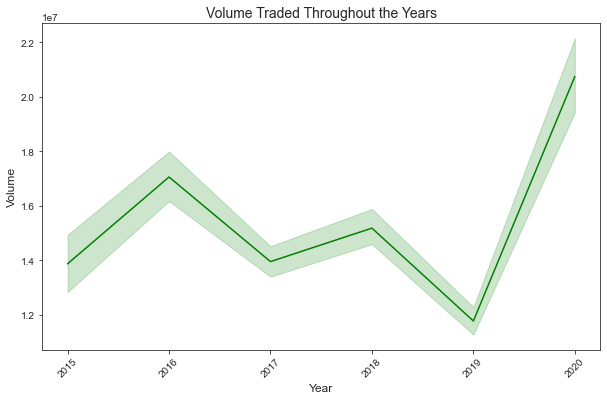

In [73]:
# volume traded throughout the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Volume', data=df, color='g')
plt.title('Volume Traded Throughout the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Volume', fontsize=12)
plt.show();

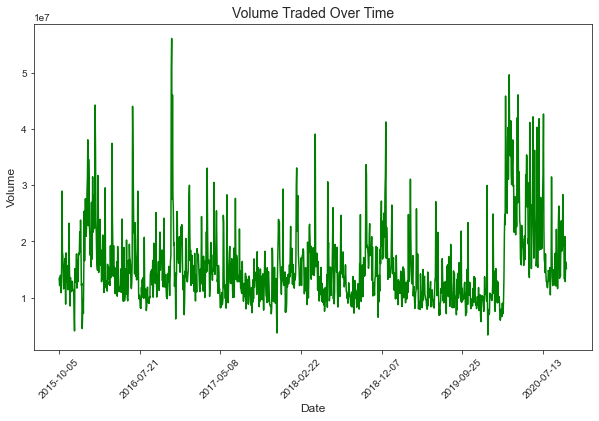

In [74]:
# Volume by date
df['Volume'].groupby(df['Date']).mean().plot(figsize=(10, 6), color='g')
plt.title('Volume Traded Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Volume', fontsize=12)
plt.show();

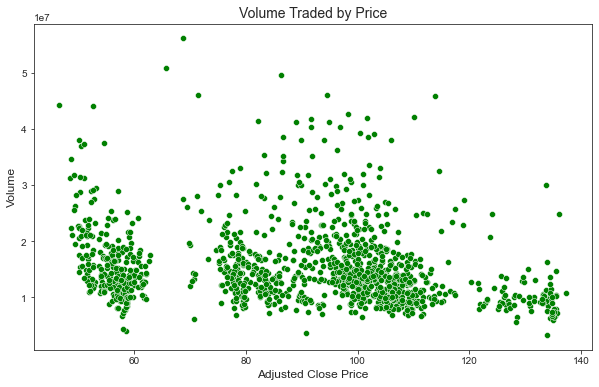

In [75]:
# Volume by price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Volume', data=df, color='g')
plt.title('Volume Traded by Price', fontsize=14)
plt.xlabel('Adjusted Close Price', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.show();

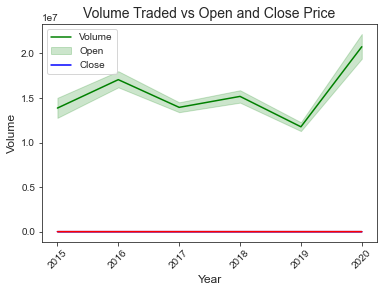

In [76]:
sns.lineplot(x='Year', y='Volume', data=df, color='g')
sns.lineplot(x='Year', y='Open', data=df, color='b')
sns.lineplot(x='Year', y='Close', data=df, color='r')
plt.title('Volume Traded vs Open and Close Price', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Volume', fontsize=12)
plt.legend(labels=['Volume', 'Open', 'Close'])
plt.show();

In [77]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2015-10-05,61.240002,62.240002,61.220001,62.020000,54.069050,13471100,2015,10,0
1,2015-10-06,62.110001,62.360001,61.619999,62.049999,54.095207,12134800,2015,10,1
2,2015-10-07,62.549999,63.029999,61.759998,62.130001,54.164944,12773100,2015,10,2
3,2015-10-08,61.849998,62.250000,61.430000,62.130001,54.164944,13964600,2015,10,3
4,2015-10-09,62.389999,62.549999,61.580002,61.930000,53.990582,12112000,2015,10,4


## High
* High is the highest price of the stock on a particular day

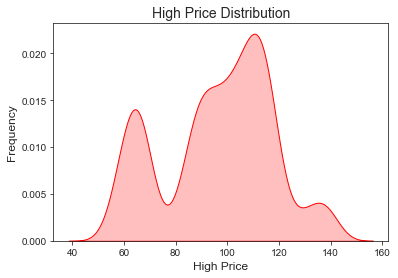

In [78]:
# High price distribution
sns.kdeplot(df['High'], shade=True, color='r')
plt.title('High Price Distribution', fontsize=14)
plt.xlabel('High Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

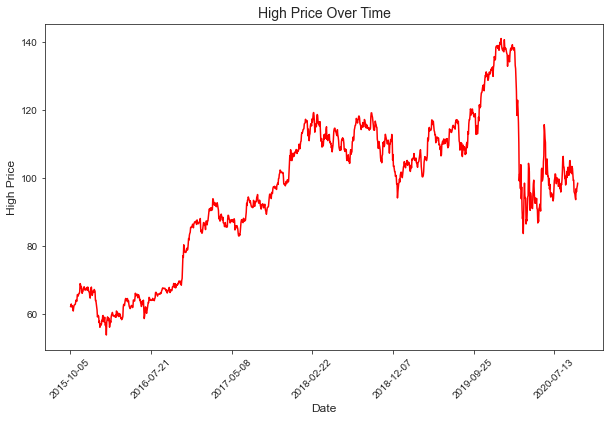

In [79]:
# High price by date
df['High'].groupby(df['Date']).mean().plot(figsize=(10, 6), color='r')
plt.title('High Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('High Price', fontsize=12)
plt.show();

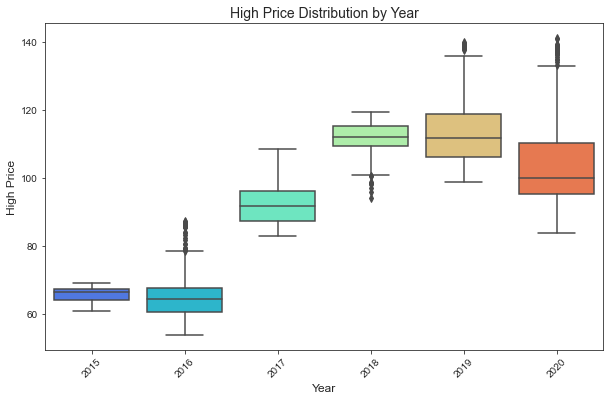

In [80]:
# Boxplot of the high price by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='High', data=df, palette='rainbow')
plt.title('High Price Distribution by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('High Price', fontsize=12)
plt.show();

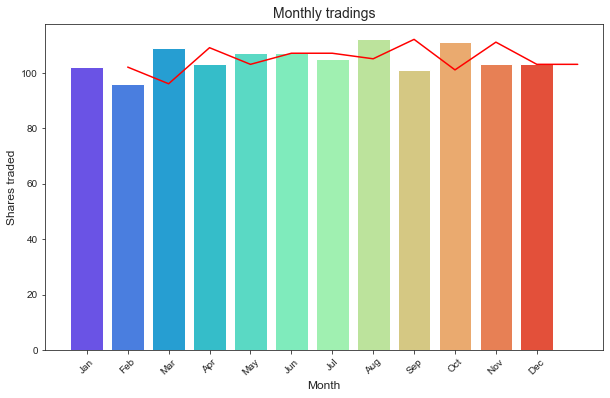

In [81]:
plt.figure(figsize=(10, 6))
x = df['Month'].value_counts().index
y = df['Month'].value_counts().values
sns.barplot(x=x, y=y, palette='rainbow')
sns.lineplot(x=x, y=y, color='r')
plt.title('Monthly tradings', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',        
                            'Nov', 'Dec'), rotation=45)
plt.ylabel('Shares traded', fontsize=12)
plt.show();

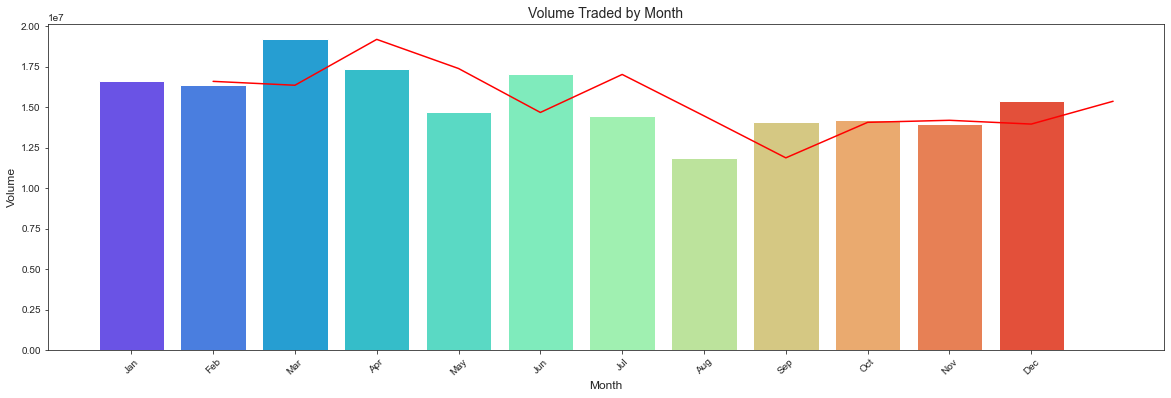

In [82]:
x = df['Volume'].groupby(df['Month']).mean().index
y = df['Volume'].groupby(df['Month']).mean().values
plt.figure(figsize=(20, 6))
sns.barplot(x=x, y=y, palette='rainbow')
sns.lineplot(x=x, y=y, color='r')
plt.title('Volume Traded by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                            'Nov', 'Dec'), rotation=45)
plt.ylabel('Volume', fontsize=12)
plt.show();


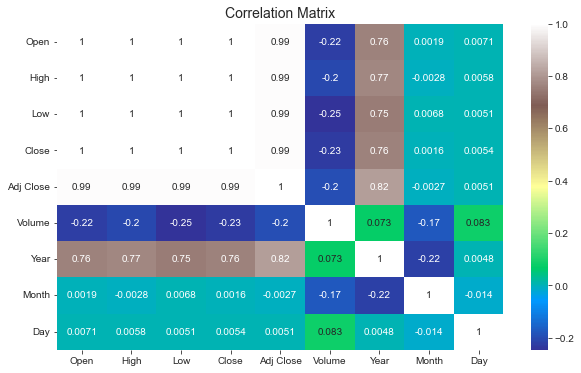

In [83]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='terrain')
plt.title('Correlation Matrix', fontsize=14);

# Machine Learning Models on Improving Customer Onboarding at JPMorgan Chase & Co.

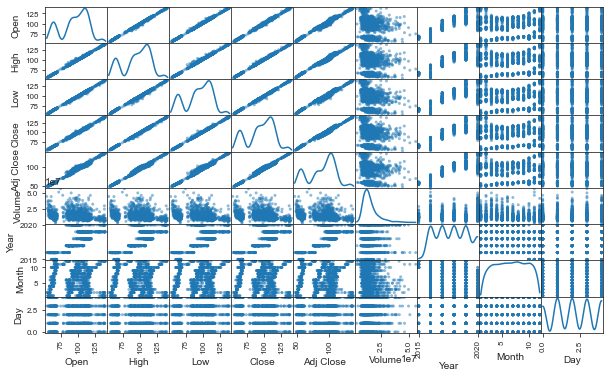

In [84]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.select_dtypes('number'), figsize=(10, 6), diagonal='kde')
plt.show();

In [85]:
# Correlation between the adjusted close price and the other variables
df.select_dtypes('number').corr()['Adj Close'].sort_values(ascending=False)

Adj Close    1.000000
High         0.994873
Close        0.994455
Open         0.993028
Low          0.992478
Year         0.815013
Day          0.005136
Month       -0.002699
Volume      -0.195340
Name: Adj Close, dtype: float64

## Model to predict the adjusted close price

In [86]:
# Model to predict the adjusted close price
# Splitting data
X = df.drop(['Adj Close', 'Date', 'Day', 'Month'], axis=1)
y = df['Adj Close']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


## 1. Linear Regression

The prediction on the test set is [ 57.58374028 105.13848898  53.09010115  57.46609548 107.99118272
  77.25274042  77.3693339   55.65330524  86.05642034 118.44914674
 110.83236575  91.39297168  84.02935569  52.4468818  104.32286237
  76.39371002 105.78489632  86.72712992  58.4459401   80.12752434
  88.30296065  80.00109495  69.17748614  50.47343379  96.56055525
 100.24596882 113.949829    98.90144589 105.21278341  94.31578908
  52.82433922 101.84221021  58.90723384 107.24230335  79.03680852
  50.25406332  98.80564957  52.5355282   93.50214292 100.20426981
  55.08017882  96.72854055 101.46287036  86.67207756 106.06937515
  75.68938682 106.78953492 107.64102399 106.46635104  79.85641393
  79.56469547 102.01951545  60.08062727  59.52695563  90.53498401
  97.52575583  57.73065699 102.89685803 102.48558125 125.88634463
  52.88349387  77.80461596 104.93986247  98.69995006  97.60328461
 107.96806023 109.61321626 134.19149792 104.87155037 104.30814049
  53.29553101 131.26197878 102.15123246 10

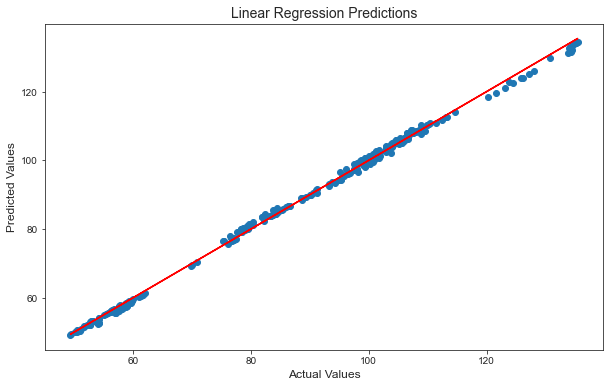

In [87]:
# Linear Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions on the test set
lr_y_pred = lr.predict(X_test)
print(f'The prediction on the test set is {lr_y_pred}')

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'The mean absolute error is {mean_absolute_error(y_test, lr_y_pred)}', '\n')
print(f'The mean squared error is {mean_squared_error(y_test, lr_y_pred)}', '\n')
print(f'The root mean squared error is {np.sqrt(mean_squared_error(y_test, lr_y_pred))}', '\n')
print(f'The coefficient of determination is {r2_score(y_test, lr_y_pred)}')

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_y_pred)
plt.plot(y_test, y_test, 'r')
plt.title('Linear Regression Predictions', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show();

## 2.Lasso Regression

C:\Users\n\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.949e+03, tolerance: 4.863e+01
  model = cd_fast.enet_coordinate_descent(


The prediction on the test set is [ 57.51857818 105.44618581  52.70274092  58.77212966 109.09377864
  77.07098481  78.92245719  56.96178824  86.88800023 118.27286556
 110.42833584  89.0171439   84.62538987  53.45795132 103.03324226
  77.58708559 104.75349869  83.99753613  58.30758056  80.44928735
  89.73042323  82.23657073  70.28313825  50.24751434  94.9059063
 102.87531677 115.758196    99.03185405 104.30315618  91.70588933
  52.66994049 100.41721519  59.18282882 108.56822396  79.33591449
  50.79191166  97.74385244  53.88927914  90.88148427  98.8903391
  55.1687045   95.23886318 102.37025149  88.74621852 104.93980245
  77.34429416 105.96852301 107.1254531  106.87696003  79.91170692
  79.73697245 100.37656419  60.21059726  59.69261251  88.70148241
  96.23612361  57.77772529 102.94152325 101.23220712 126.28189773
  52.63788236  78.44990634 105.36260894  99.60849667  99.37021481
 109.40151248 110.83301149 134.01807538 105.54610318 104.89430446
  52.9381749  132.54060408 100.95278597 103.

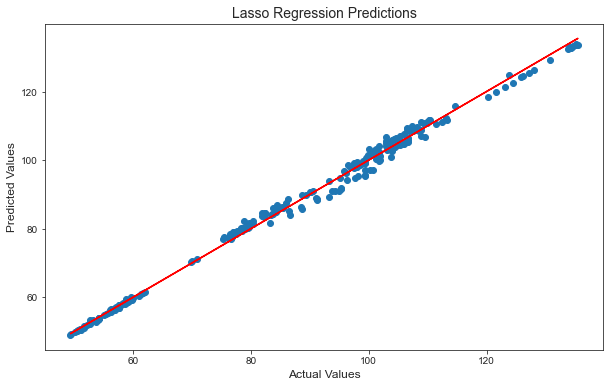

In [88]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)

# Predictions on the test set
lasso_y_pred = lasso.predict(X_test)
print(f'The prediction on the test set is {lasso_y_pred}')

# Evaluation
print(f'The mean absolute error is {mean_absolute_error(y_test, lasso_y_pred)}', '\n')
print(f'The mean squared error is {mean_squared_error(y_test, lasso_y_pred)}', '\n')
print(f'The root mean squared error is {np.sqrt(mean_squared_error(y_test, lasso_y_pred))}', '\n')
print(f'The coefficient of determination is {r2_score(y_test, lasso_y_pred)}')

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_y_pred)
plt.plot(y_test, y_test, 'r')
plt.title('Lasso Regression Predictions', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show();

## 3. Decision Tree Regression

The prediction on the test set is [ 57.69054  105.00415   52.623802  59.186512 106.395332  75.509857
  78.000671  57.137783  85.989517 118.962532 110.415054  90.824951
  83.428543  54.164944 104.037422  76.673973 106.143684  86.190117
  58.763363  79.512321  88.936508  78.984383  69.466995  50.324356
  95.133316  99.314072 112.916542  97.802261 105.090492  95.550003
  52.623802 100.303192  59.333618 106.207306  78.261681  50.6842
  97.51355   54.790546  94.261467  98.817924  55.312195  98.279999
 100.121498  91.9002   105.857994  76.072647 106.270531 108.800644
 104.929375  78.000671  78.000671 100.6269    60.797077  59.9217
  90.824951  96.380562  58.079567 102.019081 101.017258 128.040176
  52.623802  77.394424 105.010635  99.400742  98.337761 107.137802
 107.843147 135.262665 104.599243 104.774521  52.623802 133.7668
 102.940002 103.679939  85.457138  51.632065  54.852432  56.91003
 109.616776 106.877937  79.19281   84.043549 101.36515   78.515099
 135.412704  61.344551  95.550003  

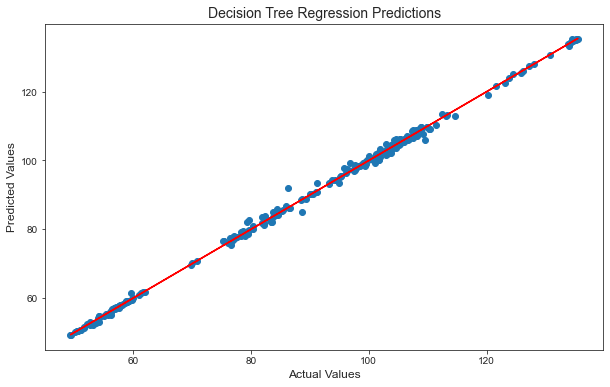

In [89]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Predictions on the test set
dt_y_pred = dt.predict(X_test)
print(f'The prediction on the test set is {dt_y_pred}', '\n')

# Evaluation
print(f'The mean absolute error is {mean_absolute_error(y_test, dt_y_pred)}', '\n')
print(f'The mean squared error is {mean_squared_error(y_test, dt_y_pred)}', '\n')
print(f'The root mean squared error is {np.sqrt(mean_squared_error(y_test, dt_y_pred))}', '\n')
print(f'The coefficient of determination is {r2_score(y_test, dt_y_pred)}')

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_y_pred)
plt.plot(y_test, y_test, 'r')
plt.title('Decision Tree Regression Predictions', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show();

## 4. Random Forest Regression

The prediction on the test set is [ 57.76662175 105.0601899   52.69302724  58.92483108 107.08449386
  75.59994838  78.33044171  57.12866685  86.10123659 119.69163946
 111.24166601  90.69428726  83.35061125  54.10832451 104.13440245
  77.32299434 105.96285151  83.99729224  58.75258107  79.34355977
  89.17857412  81.09205479  69.95344225  50.48988835  95.00870797
 100.26107196 113.86646869  97.89635424 105.04484158  94.29891161
  52.56150992 100.5490482   59.32560244 106.53650042  77.97110935
  50.65550835  97.9339969   54.75015097  93.17806661  98.71418161
  55.06182712  97.52366112 100.71816054  89.77420116 105.90807576
  76.84011713 106.44383191 108.45776014 105.40334989  78.6334877
  78.36817919 100.84202726  60.6262602   59.93459398  89.96447099
  96.10852897  57.58267467 101.92293737 101.40805226 128.19449435
  52.5362923   76.91475884 104.22533449  98.46172144  97.98092256
 107.23341355 108.64220517 135.14293331 104.20555081 104.08351724
  53.2253173  134.00960468 103.22105013 104

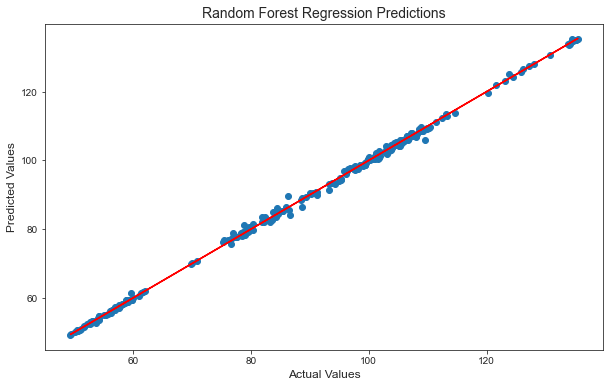

In [90]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predictions on the test set
rf_y_pred = rf.predict(X_test)
print(f'The prediction on the test set is {rf_y_pred}', '\n')

# Evaluation
print(f'The mean absolute error is {mean_absolute_error(y_test, rf_y_pred)}', '\n')
print(f'The mean squared error is {mean_squared_error(y_test, rf_y_pred)}', '\n')
print(f'The root mean squared error is {np.sqrt(mean_squared_error(y_test, rf_y_pred))}', '\n')
print(f'The coefficient of determination is {r2_score(y_test, rf_y_pred)}')

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred)
plt.plot(y_test, y_test, 'r')
plt.title('Random Forest Regression Predictions', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show();

## 5.XGBoost Regression (my personal favourite)

The prediction on the test set is [ 57.7115   104.585724  52.806732  58.753082 106.70123   75.42541
  77.87897   57.15828   86.46157  120.85615  112.19674   92.15099
  83.52501   54.214863 103.74433   76.85576  105.97821   85.297676
  58.440926  78.89721   89.48228   80.14942   70.7748    50.510654
  95.16502   99.89788  114.94659   98.42582  104.38616   94.32173
  52.873352 100.20302   59.40907  106.428085  77.75273   50.458576
  97.694244  54.3709    93.72932   98.87019   54.98255   96.3086
 100.33288   89.69671  105.95974   76.35581  105.75388  108.984344
 105.60989   78.86565   78.41633  100.86404   60.673607  59.768253
  90.36307   96.42456   58.029766 101.817696 101.3401   128.89844
  52.618435  77.163284 104.56484   98.5236    97.84516  107.42947
 109.793655 135.58707  104.03262  103.904625  52.87268  134.30235
 102.03055  104.38829   85.53373   51.675385  54.84585   56.276867
 109.30036  107.890236  78.95098   83.62195  100.97793   79.10375
 135.01772   61.57879   95.47571   49

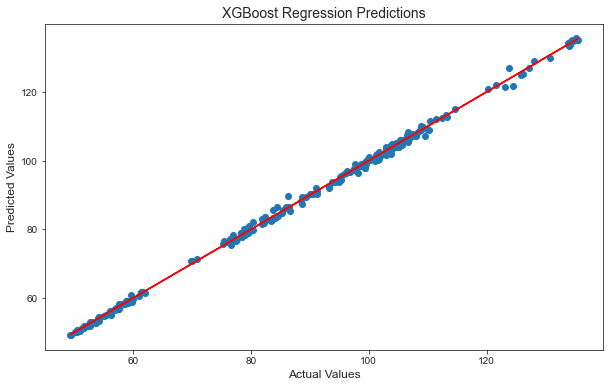

In [91]:
# XGBoost Regression (my personal favourite)
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Predictions on the test set
xgb_y_pred = xgb.predict(X_test)
print(f'The prediction on the test set is {xgb_y_pred}', '\n')

# Evaluation
print(f'The mean absolute error is {mean_absolute_error(y_test, xgb_y_pred)}', '\n')
print(f'The mean squared error is {mean_squared_error(y_test, xgb_y_pred)}', '\n')
print(f'The root mean squared error is {np.sqrt(mean_squared_error(y_test, xgb_y_pred))}', '\n')
print(f'The coefficient of determination is {r2_score(y_test, xgb_y_pred)}')

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_y_pred)
plt.plot(y_test, y_test, 'r')
plt.title('XGBoost Regression Predictions', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show();

In [92]:
# Testing the model on a new data
new_data = [[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data = scaler.fit_transform(new_data)

import numpy as np

# Testing the model on a new data
new_data = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575]])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data = scaler.fit_transform(new_data)

print(f'The prediction on the new data is {xgb.predict(new_data)}')    

The prediction on the new data is [48.83818]


THE END OF ANALYSIS "Improving Customer Onboarding at JPMorgan Chase & Co"